# Election 2000

This notebook uses data from the 2000 US presidential election to demonstrate the use of categorical predictor variables in regression models.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from data_util import *

df = pd.read_csv('./election-2000.csv')
df.head()

,State,Bush%,Age65%,Urban%,ColGrad%,Union%,Region
0,AL,56.5,13.0,69.9,20.4,9.6,Seast
1,AK,58.6,5.7,41.5,28.1,21.9,West
2,AZ,51.0,13.0,88.2,24.6,6.4,West
3,AR,51.3,14.0,49.9,18.4,5.8,Seast
4,CA,41.7,10.6,96.7,27.5,16.0,West


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8DE0BED68>,
      dtype=object)

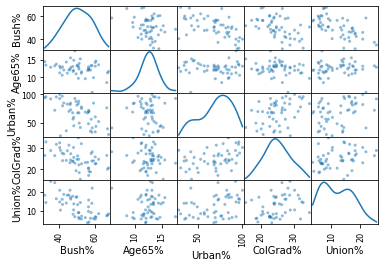

In [10]:
# Look at the raw data.
pd.plotting.scatter_matrix(df, diagonal='kde')

In [11]:
# Illustrate the cat_features and cat_feature_inds in data_util module
print(cat_features(df))
print(cat_feature_inds(df))

['State', 'Region']
[0, 6]


In [12]:
del df['State']

In [13]:
df.head()

,Bush%,Age65%,Urban%,ColGrad%,Union%,Region
0,56.5,13.0,69.9,20.4,9.6,Seast
1,58.6,5.7,41.5,28.1,21.9,West
2,51.0,13.0,88.2,24.6,6.4,West
3,51.3,14.0,49.9,18.4,5.8,Seast
4,41.7,10.6,96.7,27.5,16.0,West


In [14]:
# Transform categorical variables into one-hot-encoded format
df = pd.get_dummies(df, columns=cat_features(df))

features = list(df)
features.remove('Bush%')
features

['Age65%',
 'Urban%',
 'ColGrad%',
 'Union%',
 'Region_MidWest',
 'Region_Neast',
 'Region_Seast',
 'Region_West']

In [16]:
# Select x and y data
data_x = df[features]
data_y = df['Bush%']

# Split training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, 
                                                    test_size=0.3, random_state=4)
# Create linear model
linear_mod = linear_model.LinearRegression()

# Fit the model
linear_mod.fit(x_train, y_train)

# Make predictions
preds = linear_mod.predict(x_test)

# Look at error metrics
print_regression_error_report(y_test, preds)

MSE, MAE, R^2, EVS: [16.854332060788725, 2.7764640049806744, 0.7867240966299982, 0.7910071849436244]
